In [11]:
!pip install tensorflow-gpu

In [12]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import os

In [0]:
url_train = '/gdrive/My Drive/sisrec/training'
url_test = '/gdrive/My Drive/sisrec/test'

In [15]:
url_train

'/gdrive/My Drive/sisrec/training'

In [0]:
im_size = (256, 256)
im_size2 = (256, 256, 3)

In [0]:
from tensorflow.keras import Sequential

In [18]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2, height_shift_range = 0.2,
    zoom_range = 0.2
)
# Gvfet data from folder
data_train = datagen.flow_from_directory(url_train,
                                         target_size = im_size,
                                         batch_size = 300,
                                         class_mode = 'categorical'
                                         )



Found 3491 images belonging to 4 classes.


In [19]:
data_train.class_indices

{'bus': 0, 'car': 1, 'cats': 2, 'dogs': 3}

In [0]:
model = Sequential([
        Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = im_size2),
        Conv2D(32, 3, padding = 'same', activation = 'relu'),
        MaxPool2D(),                                            
        Conv2D(64, 3, padding = 'same', activation = 'relu'),
        Conv2D(64, 3, padding = 'same', activation = 'relu'),
        MaxPool2D(),                                            
        Conv2D(128, 3, padding = 'same', activation = 'relu'),
        Conv2D(128, 3, padding = 'same', activation = 'relu'),
        MaxPool2D(),
        Conv2D(256, 3, padding = 'same', activation = 'relu'),
        Conv2D(256, 3, padding = 'same', activation = 'relu'),
        # MaxPool2D(),
        # Conv2D(512, 3, padding = 'same', activation = 'relu'),
        # Conv2D(512, 3, padding = 'same', activation = 'relu'),
        GlobalAveragePooling2D(),
        Dense(500, activation='relu'),
        Dropout(0.5),
        Dense(data_train.num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit_generator(data_train, epochs = 75)

  ...
    to  
  ['...']
Train for 12 steps
Epoch 1/75
12/12 [==============================] - 1504s 125s/step - loss: 1.3646 - accuracy: 0.2873
Epoch 2/75
12/12 [==============================] - 60s 5s/step - loss: 1.3091 - accuracy: 0.3225
Epoch 3/75
12/12 [==============================] - 58s 5s/step - loss: 1.1753 - accuracy: 0.3973
Epoch 4/75
12/12 [==============================] - 58s 5s/step - loss: 1.0301 - accuracy: 0.4586
Epoch 5/75
12/12 [==============================] - 57s 5s/step - loss: 0.9481 - accuracy: 0.4689
Epoch 6/75
12/12 [==============================] - 57s 5s/step - loss: 0.9351 - accuracy: 0.4801
Epoch 7/75
12/12 [==============================] - 57s 5s/step - loss: 0.9237 - accuracy: 0.4927
Epoch 8/75
12/12 [==============================] - 56s 5s/step - loss: 0.9156 - accuracy: 0.4821
Epoch 9/75
12/12 [==============================] - 56s 5s/step - loss: 0.8967 - accuracy: 0.4870
Epoch 10/75
12/12 [==============================] - 56s 5s/step - los

## Train dilakukan 2 kali

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 64, 64, 128)      

In [28]:
model.evaluate_generator(data_train)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.28583859528104466, 0.88054997]

In [0]:
model.save('model_new.h5')

In [22]:
from tensorflow.keras.models import load_model

model = load_model('model_new.h5')

OSError: ignored

In [0]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

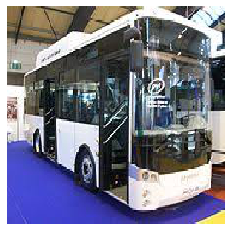

In [52]:
img = load_img('/gdrive/My Drive/sisrec/test/bus/images-324.jpeg', target_size = im_size)
plt.imshow(img)
plt.axis('off')
plt.show()

In [53]:
img = np.array(img, dtype='float')
img = img.reshape(1, 256, 256, 3)
prediksi = model.predict(img)
idx = np.argmax(prediksi)
print(idx)

0


In [54]:
labels = [v for v in data_train.class_indices.keys()]
print("It is a ", labels[idx])

It is a  bus
